In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
incidents = pd.read_csv('../data/incidents.csv')

In [3]:
incidents.head()

,authors,source_domain,title,url,incident_id,ref_number,date_downloaded,date_modified,date_published,incident_date,submitters,date_submitted,report_number,epoch_date_downloaded,epoch_date_modified,epoch_date_published,epoch_date_submitted,epoch_incident_date,text
0,"[""Alistair Barr""]",blogs.wsj.com,Google’s YouTube Kids App Criticized for ‘Inap...,https://blogs.wsj.com/digits/2015/05/19/google...,1,0,2019-04-13,2020-06-14,2015-05-19,2015-05-19,"[""Roman Yampolskiy""]",2019-06-01,1,1.555114e+09,1.592093e+09,1.431994e+09,1.559347e+09,1.431994e+09,Child and consumer advocacy groups complained ...
1,"[""Phoebe Weston""]",dailymail.co.uk,YouTube Kids app is STILL showing disturbing v...,https://www.dailymail.co.uk/sciencetech/articl...,1,1,2019-04-13,2020-06-14,2018-02-07,2015-05-19,"[""Roman Yampolskiy""]",2019-06-01,2,1.555114e+09,1.592093e+09,1.517962e+09,1.559347e+09,1.431994e+09,Google-owned YouTube has apologised again afte...
2,"[""Terri Peters""]",today.com,Disturbing YouTube Kids video shows Mickey Mou...,https://www.today.com/parents/moms-warn-distur...,1,10,2019-04-13,2020-06-14,2016-08-06,2015-05-19,"[""Roman Yampolskiy""]",2019-06-01,3,1.555114e+09,1.592093e+09,1.470442e+09,1.559347e+09,1.431994e+09,"Update, Nov. 7, 2017: TODAY Parents is reshari..."
3,"[""Zoë Bernard""]",businessinsider.com,YouTube has thousands of disturbing videos tar...,https://www.businessinsider.com/youtube-has-th...,1,11,2019-04-13,2020-06-14,2017-11-08,2015-05-19,"[""Roman Yampolskiy""]",2019-06-01,4,1.555114e+09,1.592093e+09,1.510099e+09,1.559347e+09,1.431994e+09,"An off-brand Paw Patrol video called ""Babies P..."
4,"[""Julia Alexander""]",polygon.com,YouTube Kids has been a problem since 2015 - w...,https://www.polygon.com/2017/12/8/16737556/you...,1,12,2019-04-13,2020-06-14,2017-12-08,2015-05-19,"[""Roman Yampolskiy""]",2019-06-01,5,1.555114e+09,1.592093e+09,1.512691e+09,1.559347e+09,1.431994e+09,"InIn the last few weeks, the world has learned..."


In [4]:
incidents.columns

Index(['authors', 'source_domain', 'title', 'url', 'incident_id', 'ref_number',
       'date_downloaded', 'date_modified', 'date_published', 'incident_date',
       'submitters', 'date_submitted', 'report_number',
       'epoch_date_downloaded', 'epoch_date_modified', 'epoch_date_published',
       'epoch_date_submitted', 'epoch_incident_date', 'text'],
      dtype='object')

In [5]:
incidents['incident_id'].sample(5)

347      3
554     37
107     17
1065    68
738     47
Name: incident_id, dtype: int64

In [6]:
incidents['report_number'].value_counts()

1335    124
402       1
424       1
425       1
426       1
       ... 
883       1
884       1
885       1
886       1
1         1
Name: report_number, Length: 1167, dtype: int64

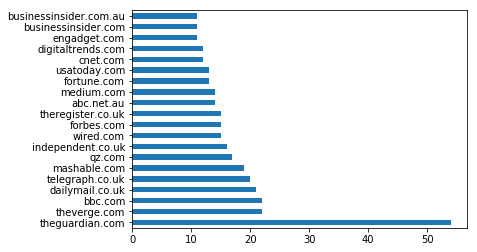

In [7]:
incidents['source_domain'].value_counts().head(20).plot.barh()

In [8]:
incidents.shape

(1290, 19)

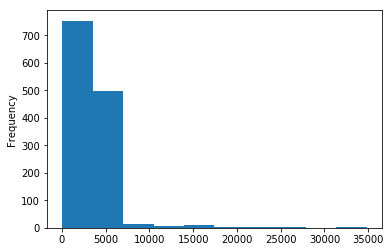

In [9]:
incidents['text'].apply(len).plot.hist()

In [10]:
tl_incidents = incidents[['date_published', 'incident_id']]

In [11]:
tl_incidents.groupby('date_published')['incident_id'].value_counts().unstack().fillna(0)

incident_id,1,2,3,4,5,6,7,8,9,10,...,118,119,120,121,122,123,124,125,126,127
date_published,,,,,,,,,,,,,,,,,,,,,
1996-04-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998-03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-08-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-09-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-05-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2021-08-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
tl_incidents.groupby('date_published')['incident_id'].value_counts().to_csv('incident_timeline.csv')

In [13]:
len(incidents['incident_id'].unique())

126

In [14]:
incidents['incident_id']

0         1
1         1
2         1
3         1
4         1
       ... 
1285    126
1286    126
1287    127
1288    127
1289    127
Name: incident_id, Length: 1290, dtype: int64